In [1]:
import pandas as pd

df = pd.read_csv('Medical_Insurance_dataset.csv')

In [2]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
df.loc[df['sex']=='male','sex']=0
df.loc[df['sex']=='female','sex']=1
df['sex']=df['sex'].astype('int32')

In [4]:
df.loc[df['smoker']=='no','smoker']=0
df.loc[df['smoker']=='yes','smoker']=1
df['smoker']=df['smoker'].astype('int32')

In [5]:
df = pd.get_dummies(df)

In [6]:
df.head()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,21.000000,0,25.745000,0,2,3279.868550,1,0,0,0
1,36.976978,1,25.744165,1,3,21454.494239,0,0,1,0
2,18.000000,0,30.030000,0,1,1720.353700,0,0,1,0
3,37.000000,0,30.676891,0,3,6801.437542,1,0,0,0
4,58.000000,0,32.010000,0,1,11946.625900,0,0,1,0


In [7]:
df.describe()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,0.441047,30.629652,0.154270,2.503581,12784.808644,0.233609,0.250964,0.281267,0.234160
std,12.151029,0.496581,5.441307,0.361257,1.712568,10746.166743,0.423184,0.433628,0.449680,0.423531
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,26.694526,0.000000,1.000000,5654.818262,0.000000,0.000000,0.000000,0.000000
50%,39.170922,0.000000,30.200000,0.000000,3.000000,9443.807222,0.000000,0.000000,0.000000,0.000000
75%,48.343281,1.000000,34.100000,0.000000,4.000000,14680.407505,0.000000,1.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,1.000000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [8]:
feature = df[df.keys().drop('charges')].values
outcome = df['charges'].values

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
feature_poly = poly.fit_transform(feature)

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(feature, outcome, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(train_input, train_target)

SGDRegressor()

In [12]:
y_pred = sgd.predict(test_input)

In [13]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE :",mean_absolute_error(test_target, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(test_target, y_pred)))

MAE : 5517.404681501185
RMSE : 7544.05451163124


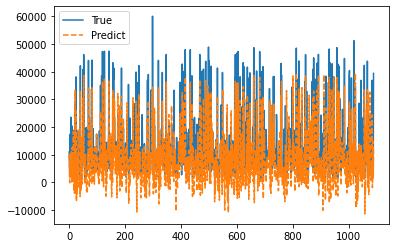

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(test_target, linestyle='-',label='True')
plt.plot(y_pred, linestyle='--', label='Predict')
plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(feature, outcome, test_size=0.3, random_state=42)

In [16]:
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler()
train_input_scaled = feature_scaler.fit_transform(train_input)
test_input_scaled = feature_scaler.transform(test_input)

In [17]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(train_input_scaled, train_target)

SGDRegressor()

In [18]:
y_pred = sgd.predict(test_input_scaled)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE :",mean_absolute_error(test_target, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(test_target, y_pred)))

MAE : 3862.0216205787115
RMSE : 5799.596912892567


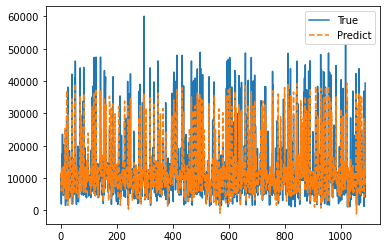

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(test_target, linestyle='-',label='True')
plt.plot(y_pred, linestyle='--', label='Predict')
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(feature_poly, outcome, test_size=0.3, random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler()
train_input_scaled = feature_scaler.fit_transform(train_input)
test_input_scaled = feature_scaler.transform(test_input)

In [23]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(train_input_scaled, train_target)

SGDRegressor()

In [24]:
y_pred = sgd.predict(test_input_scaled)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE :",mean_absolute_error(test_target, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(test_target, y_pred)))

MAE : 2980.191767644841
RMSE : 4973.513624218002


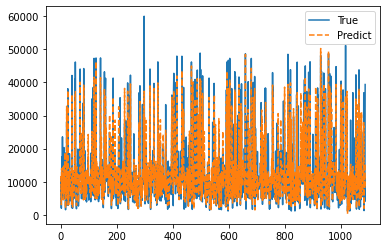

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(test_target, linestyle='-',label='True')
plt.plot(y_pred, linestyle='--', label='Predict')
plt.legend()
plt.show()